# Redes neuronales y gradiente descendente
Batch, Mini-batch y Descenso de Gradiente Estocástico
• Si usamos todos los puntos del conjunto de entrenamiento (n = N) para calcular la pérdida, estamos realizando un descenso de gradiente por lotes (batch gradient descent).
• Si utilizamos un solo punto (n = 1) cada vez, estaríamos realizando un descenso de gradiente estocástico (stochastic gradient descent).
• Cualquier otro valor de
𝑛
n entre 1 y
𝑁
N caracteriza un descenso de gradiente en mini-lotes (mini-batch gradient descent).


El número de actualizaciones (N/n) dependerá del tipo de descenso de gradiente que se utilice:

- Para el descenso de gradiente por lotes (n = N), esto es trivial, ya que utiliza todos los puntos para calcular la pérdida: una época equivale a una sola actualización.
- Para el descenso de gradiente estocástico (n = 1), una época significa N actualizaciones, ya que cada punto de datos individual se usa para realizar una actualización.
- Para el descenso de gradiente en mini-lotes (de tamaño n), una época tiene N/n actualizaciones, ya que se usa un mini-lote de n puntos de datos para realizar una actualización.

In [ ]:
import torch
from sklearn import datasets
import pandas as pd


# Cargar el dataset Iris
iris = datasets.load_iris()

# Convertirlo a un DataFrame de pandas
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target  # Agregar la columna de etiquetas numéricas
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})  # Convertir a nombres de especies

# Mostrar las primeras filas
df.head()

In [ ]:
N = df.shape[0]

In [ ]:
# Extraer las columnas usando NumPy
import numpy as np
x = np.array(df['petal length (cm)'])  # Definir x como petal length
y = np.array(df['petal width (cm)'])   # Definir y como petal width

# Mostrar los primeros valores
print("x (Petal Length):", x[:5])
print("y (Petal Width):", y[:5])

# Mezcla los índices
idx = np.arange(N)
np.random.shuffle(idx)

# Usa los primeros 80% de índices para entrenamiento
train_idx = idx[:int(N * 0.8)]
# Usa el 20% restante para validación
val_idx = idx[int(N * 0.8):]

# Generar los conjuntos de entrenamiento y validación
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

# Mostrar tamaños de los conjuntos
print(f"Train set: {x_train.shape}, {y_train.shape}")
print(f"Validation set: {x_val.shape}, {y_val.shape}")

In [ ]:
x_train_tensor = torch.as_tensor(x_train)
y_train_tensor = torch.as_tensor(y_train)

In [ ]:
device = 'cpu'


# Fase de entrenamiento

In [ ]:
import torch

# Supongamos que x_train_tensor y y_train_tensor están definidos
# y tienen la misma cantidad de elementos

# Define la tasa de aprendizaje
lr = 0.001

# Número de épocas
n_epochs = 1000

# Inicialización de parámetros
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)

# Bucle de entrenamiento
for epoch in range(n_epochs):
    for i in range(len(x_train_tensor)):  # Iteramos sobre cada punto de datos
        x_i = x_train_tensor[i]  # Seleccionamos un solo punto x
        y_i = y_train_tensor[i]  # Seleccionamos su correspondiente y

        # Paso 1: Predicción del modelo
        yhat = b + w * x_i

        # Paso 2: Cálculo de la pérdida (error cuadrático medio para un solo punto)
        loss = (yhat - y_i) ** 2

        # Paso 3: Cálculo de gradientes
        loss.backward()

        # Paso 4: Actualización de parámetros
        with torch.no_grad():
            b -= lr * b.grad
            w -= lr * w.grad

        # Limpiar gradientes antes de la siguiente iteración
        b.grad.zero_()
        w.grad.zero_()

    # Imprimir cada 50 épocas
    #if (epoch + 1) % 50 == 0:
    if (epoch + 1) in [1, 10, 30] or (epoch + 1) % 50 == 0:
        print(f"Época {epoch+1}: b = {b.item()}, w = {w.item()}, pérdida = {loss.item()}")

In [ ]:

from scipy import stats
# Realizar la regresión lineal
slope, intercept, r_value, p_value, std_err = stats.linregress(x_train, y_train)

# Mostrar los resultados
print(f"Coeficiente de pendiente (w): {slope}")
print(f"Coeficiente de intercepción (b): {intercept}")
print(f"Coeficiente de correlación (r): {r_value}")
print(f"Valor p: {p_value}")
print(f"Error estándar: {std_err}")

In [ ]:
lr = 0.01

# Step 0 - Initializes parameters "b" and "w" randomly
torch.manual_seed(42)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
(b, w)

In [ ]:
# Supongamos que x_train_tensor y y_train_tensor están definidos
# y tienen la misma cantidad de elementos

# Define la tasa de aprendizaje
lr = 0.001

# Número de épocas
n_epochs = 31000

# Inicialización de parámetros
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)


for epoch in range(n_epochs):
    # Step 1 - Computes model's predicted output - forward pass
    yhat = b + w * x_train_tensor

    # Step 2 - Computes the loss
    # We are using ALL data points, so this is BATCH gradient
    # descent. How wrong is our model? That's the error!
    error = (yhat - y_train_tensor)
    # It is a regression, so it computes mean squared error (MSE)
    loss = (error ** 2).mean()

    # Step 3 - Computes gradients for both "b" and "w"
    loss.backward()

    # Step 4 - Updates parameters using gradients and
    # the learning rate.
    with torch.no_grad():
        b -= lr * b.grad # b = b -lr * b.grad
        w -= lr * w.grad

    # Clears gradients
    b.grad.zero_()
    w.grad.zero_()

    # Prints values every 50 iterations
    if (epoch + 1) in [1, 10, 30] or (epoch + 1) % 50 == 0:
        print(f"Epoch {epoch+1}: b = {b.item()}, w = {w.item()}, loss = {loss.item()}")

1. Precisión vs. Velocidad
Gradiente Descendente por Lotes (Batch GD):
Precisión: Batch GD calcula el gradiente utilizando todos los datos en cada iteración, lo que proporciona una estimación más precisa y estable del gradiente.

Velocidad: Sin embargo, calcular el gradiente sobre todo el conjunto de datos puede ser muy lento, especialmente cuando el conjunto de datos es grande.

Gradiente Descendente Estocástico (SGD):
Precisión: SGD calcula el gradiente utilizando un solo punto de datos (o un mini-lote) en cada iteración, lo que introduce ruido en las actualizaciones. Esto puede hacer que las actualizaciones sean menos precisas.

Velocidad: SGD es mucho más rápido porque realiza actualizaciones frecuentes con menos cálculos por iteración.

2. Tamaño del conjunto de datos
Batch GD:
Ventaja: Funciona bien en conjuntos de datos pequeños o medianos, donde calcular el gradiente sobre todos los datos es factible.

Desventaja: En conjuntos de datos grandes, Batch GD puede ser computacionalmente costoso y lento, ya que requiere pasar por todo el conjunto de datos en cada iteración.

SGD:
Ventaja: Es ideal para conjuntos de datos grandes, ya que realiza actualizaciones con solo un punto de datos (o un mini-lote) en cada iteración.

Desventaja: En conjuntos de datos pequeños, el ruido introducido por SGD puede hacer que el entrenamiento sea menos estable.

3. Convergencia
Batch GD:
Convergencia suave: Batch GD converge de manera más suave y predecible porque utiliza el gradiente promedio de todos los datos.

Convergencia lenta: Sin embargo, puede ser lento en converger, especialmente en problemas con muchas dimensiones o datos grandes.

SGD:
Convergencia ruidosa: SGD puede oscilar alrededor del mínimo debido al ruido en las actualizaciones.

Convergencia rápida: Sin embargo, este ruido puede ayudar a SGD a escapar de mínimos locales y converger más rápido en algunos casos.

4. Mínimos locales y puntos de silla
Batch GD:
Atrapado en mínimos locales: Batch GD puede quedar atrapado en mínimos locales o puntos de silla, especialmente en funciones de pérdida no convexas.

Menos exploración: Al usar el gradiente promedio, Batch GD tiene menos capacidad para explorar el espacio de búsqueda.

SGD:
Escapa de mínimos locales: El ruido en las actualizaciones de SGD puede ayudar a escapar de mínimos locales y encontrar mejores soluciones.

Más exploración: SGD explora más el espacio de búsqueda, lo que puede ser útil en problemas no convexos.

5. Uso de memoria
Batch GD:
Alto uso de memoria: Batch GD requiere cargar todo el conjunto de datos en memoria para calcular el gradiente, lo que puede ser un problema en conjuntos de datos grandes.

SGD:
Bajo uso de memoria: SGD solo necesita cargar un punto de datos (o un mini-lote) a la vez, lo que reduce el uso de memoria.

6. Aplicaciones prácticas
Batch GD:
Recomendado para: Problemas pequeños o medianos donde la precisión es crítica y el tiempo de entrenamiento no es un problema.

Ejemplos: Regresión lineal en conjuntos de datos pequeños, problemas académicos.

SGD:
Recomendado para: Problemas grandes donde el tiempo de entrenamiento y el uso de memoria son críticos.

Ejemplos: Entrenamiento de redes neuronales en grandes conjuntos de datos (por ejemplo, ImageNet), problemas de aprendizaje profundo.

Tipicamente usa n = 32, 64, 129.

#Minibarch (n = 32)

In [ ]:
# Define la tasa de aprendizaje
lr = 0.001

# Número de épocas
n_epochs = 20000

# Tamaño del mini-batch
batch_size = 32

# Inicialización de parámetros
b = torch.randn(1, requires_grad=True, dtype=torch.float32)
w = torch.randn(1, requires_grad=True, dtype=torch.float32)

# Bucle de entrenamiento
for epoch in range(n_epochs):
    # Mezclar los datos en cada época (opcional pero recomendado)
    indices = torch.randperm(len(x_train_tensor))
    x_train_tensor = x_train_tensor[indices]
    y_train_tensor = y_train_tensor[indices]

    # Iterar sobre mini-lotes
    for i in range(0, len(x_train_tensor), batch_size):
        # Seleccionar el mini-batch actual
        x_batch = x_train_tensor[i:i + batch_size]
        y_batch = y_train_tensor[i:i + batch_size]

        # Paso 1: Predicción del modelo
        yhat = b + w * x_batch

        # Paso 2: Cálculo de la pérdida (error cuadrático medio para el mini-batch)
        loss = ((yhat - y_batch) ** 2).mean()

        # Paso 3: Cálculo de gradientes
        loss.backward()

        # Paso 4: Actualización de parámetros
        with torch.no_grad():
            b -= lr * b.grad
            w -= lr * w.grad

        # Limpiar gradientes antes de la siguiente iteración
        b.grad.zero_()
        w.grad.zero_()

    # Imprimir cada 50 épocas o en épocas específicas
    if (epoch + 1) in [1, 10, 30] or (epoch + 1) % 50 == 0:
        print(f"Época {epoch+1}: b = {b.item()}, w = {w.item()}, pérdida = {loss.item()}")

# Simplificación

In [ ]:
# Extraer las columnas usando NumPy
import numpy as np
x = np.array(df['petal length (cm)'])  # Definir x como petal length
y = np.array(df['petal width (cm)'])   # Definir y como petal width

# Mostrar los primeros valores
print("x (Petal Length):", x[:5])
print("y (Petal Width):", y[:5])

# Mezcla los índices
idx = np.arange(N)
np.random.shuffle(idx)

# Usa los primeros 80% de índices para entrenamiento
train_idx = idx[:int(N * 0.8)]
# Usa el 20% restante para validación
val_idx = idx[int(N * 0.8):]

# Generar los conjuntos de entrenamiento y validación
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

# Mostrar tamaños de los conjuntos
print(f"Train set: {x_train.shape}, {y_train.shape}")
print(f"Validation set: {x_val.shape}, {y_val.shape}")

In [ ]:
x_train_tensor = torch.as_tensor(x_train)
y_train_tensor = torch.as_tensor(y_train)

In [ ]:
import torch
import torch.optim as optim

# Define el dispositivo (CPU o GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 1. Define la tasa de aprendizaje (eta)
lr = 0.01

# 2. Inicializa los parámetros "b" y "w" aleatoriamente
torch.manual_seed(42)  # Para reproducibilidad
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)

# 3. Define un optimizador SGD para actualizar los parámetros
optimizer = optim.SGD([b, w], lr=lr)

# 4. Define el número de épocas
n_epochs = 10000

# 5. Bucle de entrenamiento
for epoch in range(n_epochs):
    # Paso 1 - Calcula la salida predicha por el modelo (forward pass)
    yhat = b + w * x_train_tensor

    # Paso 2 - Calcula la pérdida
    # Estamos usando TODOS los puntos de datos, por lo que esto es
    # Gradiente Descendente por Lotes (Batch Gradient Descent).
    error = (yhat - y_train_tensor)
    # Es una regresión, por lo que calculamos el error cuadrático medio (MSE)
    loss = (error ** 2).mean()

    # Paso 3 - Calcula los gradientes para los parámetros "b" y "w"
    loss.backward()

    # Paso 4 - Actualiza los parámetros usando los gradientes y
    # la tasa de aprendizaje. ¡No más actualización manual!
    # Step 4 - Updates parameters using gradients and
    # the learning rate. No more manual update!
    # with torch.no_grad():
    # b -= lr * b.grad
    # w -= lr * w.grad
    optimizer.step()

    # Paso 5 - Limpia los gradientes para la siguiente iteración
    optimizer.zero_grad()
    # No more telling Pytorch to let gradients go!
    # b.grad.zero_()
    # w.grad.zero_()

# 6. Imprime los parámetros finales
print(f"Parámetro b: {b.item()}")
print(f"Parámetro w: {w.item()}")

# Definición de función de perdida

In [ ]:
import torch.nn as nn  # Importa el módulo nn para usar MSELoss
import torch
import torch.optim as optim
import torch.nn as nn

Ejemplo de función de perdida

In [ ]:
loss_fn = nn.MSELoss(reduction='mean')
# This is a random example to illustrate the loss function
predictions = torch.tensor([0.5, 1.0])
labels = torch.tensor([2.0, 1.3])
loss_fn(predictions, labels)

Usemola en la práctica:

In [ ]:
import torch
import torch.optim as optim
import torch.nn as nn


# Define el dispositivo (CPU o GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

torch.manual_seed(42)  # Para reproducibilidad
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)

# 2. Inicializa los parámetros "b" y "w" aleatoriamente

# Define el dispositivo (CPU o GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 1. Define la tasa de aprendizaje (eta)
lr = 0.01

# 2. Inicializa los parámetros "b" y "w" aleatoriamente
torch.manual_seed(42)  # Para reproducibilidad
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)

# 3. Define un optimizador y un error SGD para actualizar los parámetros
optimizer = optim.SGD([b, w], lr=lr)

# Defines an MSE loss function
loss_fn = nn.MSELoss(reduction='mean')

# 4. Define el número de épocas
n_epochs = 10000

# 5. Bucle de entrenamiento
for epoch in range(n_epochs):
    # Paso 1 - Calcula la salida predicha por el modelo (forward pass)
    yhat = b + w * x_train_tensor

    # Paso 2 - Calcula la pérdida
    # Estamos usando TODOS los puntos de datos, por lo que esto es
    # Gradiente Descendente por Lotes (Batch Gradient Descent).
    # error = (yhat - y_train_tensor)
    # Es una regresión, por lo que calculamos el error cuadrático medio (MSE)
    # loss = (error ** 2).mean()

    loss = loss_fn(yhat, y_train_tensor)

    # Paso 3 - Calcula los gradientes para los parámetros "b" y "w"
    loss.backward()

    # Paso 4 - Actualiza los parámetros usando los gradientes y
    # la tasa de aprendizaje. ¡No más actualización manual!
    # Step 4 - Updates parameters using gradients and
    # the learning rate. No more manual update!
    # with torch.no_grad():
    # b -= lr * b.grad
    # w -= lr * w.grad
    optimizer.step()

    # Paso 5 - Limpia los gradientes para la siguiente iteración
    optimizer.zero_grad()
    # No more telling Pytorch to let gradients go!
    # b.grad.zero_()
    # w.grad.zero_()

# 6. Imprime los parámetros finales
print(f"Parámetro b: {b.item()}")
print(f"Parámetro w: {w.item()}")

# Incluir el modelo

In [ ]:
class ManualLinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        # Define los parámetros "b" y "w" como nn.Parameter
        self.b = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.w = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    def forward(self, x):
        # Calcula la salida/predicción del modelo
        return self.b + self.w * x


Qué hace super().__init__()?
Inicializa la clase base (nn.Module):

La clase ManualLinearRegression hereda de nn.Module, que es la clase base para todos los modelos en PyTorch.

super().__init__() llama al método __init__ de la clase base (nn.Module) para asegurarse de que se realice la inicialización necesaria.        

Registra los parámetros y submódulos:

nn.Module tiene un mecanismo interno para rastrear los parámetros (como self.b y self.w) y submódulos (si los hubiera) que se definen en la clase.

Sin llamar a super().__init__(), este mecanismo no funcionaría correctamente, y los parámetros no se registrarían como parte del modelo.

Habilita funcionalidades de PyTorch:

nn.Module proporciona muchas funcionalidades útiles, como:

Manejo automático de gradientes.

Soporte para mover el modelo a diferentes dispositivos (CPU/GPU).

Métodos como parameters(), to(device), state_dict(), etc.

Estas funcionalidades dependen de que nn.Module se inicialice correctamente.

In [ ]:
torch.manual_seed(42)
# Creates a "dummy" instance of our ManualLinearRegression model
dummy = ManualLinearRegression()
list(dummy.parameters()) # Método heredado de nn.Module

In [ ]:
# El valor actual de los parámetros:
dummy.state_dict()

In [ ]:
optimizer.state_dict()

In [ ]:
torch.manual_seed(42)
# Creates a "dummy" instance of our ManualLinearRegression model
# and sends it to the device
dummy = ManualLinearRegression().to(device)

Construimos un modelo

In [ ]:
class ManualLinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        # Define los parámetros "b" y "w" como nn.Parameter
        self.b = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.w = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    def forward(self, x):
        # Calcula la salida/predicción del modelo
        return self.b + self.w * x

In [ ]:
# Extraer las columnas usando NumPy
import numpy as np
x = np.array(df['petal length (cm)'])  # Definir x como petal length
y = np.array(df['petal width (cm)'])   # Definir y como petal width

# Mostrar los primeros valores
print("x (Petal Length):", x[:5])
print("y (Petal Width):", y[:5])

# Mezcla los índices
idx = np.arange(N)
np.random.shuffle(idx)

# Usa los primeros 80% de índices para entrenamiento
train_idx = idx[:int(N * 0.8)]
# Usa el 20% restante para validación
val_idx = idx[int(N * 0.8):]

# Generar los conjuntos de entrenamiento y validación
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

# Mostrar tamaños de los conjuntos
print(f"Train set: {x_train.shape}, {y_train.shape}")
print(f"Validation set: {x_val.shape}, {y_val.shape}")

In [ ]:
x_train_tensor = torch.as_tensor(x_train)
y_train_tensor = torch.as_tensor(y_train)

In [ ]:
import torch
import torch.optim as optim
import torch.nn as nn


# Define el dispositivo (CPU o GPU)
# Define el dispositivo (CPU o GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 1. Define la tasa de aprendizaje (eta)
lr = 0.01

# 2. Inicializa los parámetros "b" y "w" aleatoriamente
torch.manual_seed(42)  # Para reproducibilidad
# Ya no se requiere inicializar b y w, están dentro de la clase
#b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
#w = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
# Inicializo modelo
model = ManualLinearRegression()
print(model.state_dict())

# 3. Define un optimizador y un error SGD para actualizar los parámetros
optimizer = optim.SGD(model.parameters(), lr=lr)
#optimizer = optim.SGD([b, w], lr=lr)

# Defines an MSE loss function
loss_fn = nn.MSELoss(reduction='mean')

# 4. Define el número de épocas
n_epochs = 10000

# 5. Bucle de entrenamiento
for epoch in range(n_epochs):
    # Paso 1 - Calcula la salida predicha por el modelo (forward pass)
    # Ya no se corre lo siguiente:
    # yhat = b + w * x_train_tensor
    model.train() # set the model to training mode
    yhat = model(x_train_tensor)

    # Paso 2 - Calcula la pérdida
    # Estamos usando TODOS los puntos de datos, por lo que esto es
    # Gradiente Descendente por Lotes (Batch Gradient Descent).
    # error = (yhat - y_train_tensor)
    # Es una regresión, por lo que calculamos el error cuadrático medio (MSE)
    # loss = (error ** 2).mean()

    loss = loss_fn(yhat, y_train_tensor)

    # Paso 3 - Calcula los gradientes para los parámetros "b" y "w"
    loss.backward()

    # Paso 4 - Actualiza los parámetros usando los gradientes y
    # la tasa de aprendizaje. ¡No más actualización manual!
    # Step 4 - Updates parameters using gradients and
    # the learning rate. No more manual update!
    # with torch.no_grad():
    # b -= lr * b.grad
    # w -= lr * w.grad
    optimizer.step()

    # Paso 5 - Limpia los gradientes para la siguiente iteración
    optimizer.zero_grad()
    # No more telling Pytorch to let gradients go!
    # b.grad.zero_()
    # w.grad.zero_()

print(model.state_dict())

#Más simplicado aún (nuestra primer real neuronal)

In [57]:
linear = nn.Linear(1, 1)
print(linear)

Linear(in_features=1, out_features=1, bias=True)


linear.state_dict()

In [ ]:
#class ManualLinearRegression(nn.Module):
#    def __init__(self):
#        super().__init__()
#        # Define los parámetros "b" y "w" como nn.Parameter
#        self.b = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
#        self.w = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
#
#    def forward(self, x):
#        # Calcula la salida/predicción del modelo
#       return self.b + self.w * x

In [ ]:
class MyLinearRegression(nn.Module):
  def __init__(self):
    super().__init__()
    # Instead of our custom parameters, we use a Linear model
    # with a single input and a single output
    self.linear = nn.Linear(1, 1)
    def forward(self, x):
    # Now it only makes
      self.linear(x)

In [ ]:
torch.manual_seed(42)
dummy = MyLinearRegression()
list(dummy.parameters())

In [ ]:
dummy.state_dict()

In [ ]:
torch.manual_seed(42)
# Alternatively, you can use a Sequential model
model = nn.Sequential(nn.Linear(1, 1)).to(device)

model.state_dict()

# La plantilla final

In [ ]:
x_train_tensor = torch.as_tensor(x_train, dtype=torch.float32, device=device).reshape(-1, 1)
y_train_tensor = torch.as_tensor(y_train, dtype=torch.float32, device=device).reshape(-1, 1)

In [ ]:
import torch
import torch.optim as optim
import torch.nn as nn


# Define el dispositivo (CPU o GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 1. Define la tasa de aprendizaje (eta)
lr = 0.01

# 2. Inicializa los parámetros "b" y "w" aleatoriamente
torch.manual_seed(42)  # Para reproducibilidad

# Inicializo modelo
model = nn.Sequential(nn.Linear(1, 1)).to(device)  # Mueve el modelo al dispositivo

# Imprime el estado inicial del modelo
print("Estado inicial del modelo:")
print(model.state_dict())

# 3. Define un optimizador y un error SGD para actualizar los parámetros
optimizer = optim.SGD(model.parameters(), lr=lr)

# Define una función de pérdida MSE
loss_fn = nn.MSELoss(reduction='mean')

# 4. Define el número de épocas
n_epochs = 10000

# 5. Bucle de entrenamiento
for epoch in range(n_epochs):
    # Paso 1 - Calcula la salida predicha por el modelo (forward pass)
    model.train()  # Establece el modelo en modo de entrenamiento
    yhat = model(x_train_tensor)

    # Paso 2 - Calcula la pérdida
    loss = loss_fn(yhat, y_train_tensor)

    # Paso 3 - Calcula los gradientes para los parámetros "b" y "w"
    loss.backward()

    # Paso 4 - Actualiza los parámetros usando los gradientes y la tasa de aprendizaje
    optimizer.step()

    # Paso 5 - Limpia los gradientes para la siguiente iteración
    optimizer.zero_grad()

# Imprime el estado final del modelo
print("\nEstado final del modelo:")
print(model.state_dict())

# Más redes neuronales

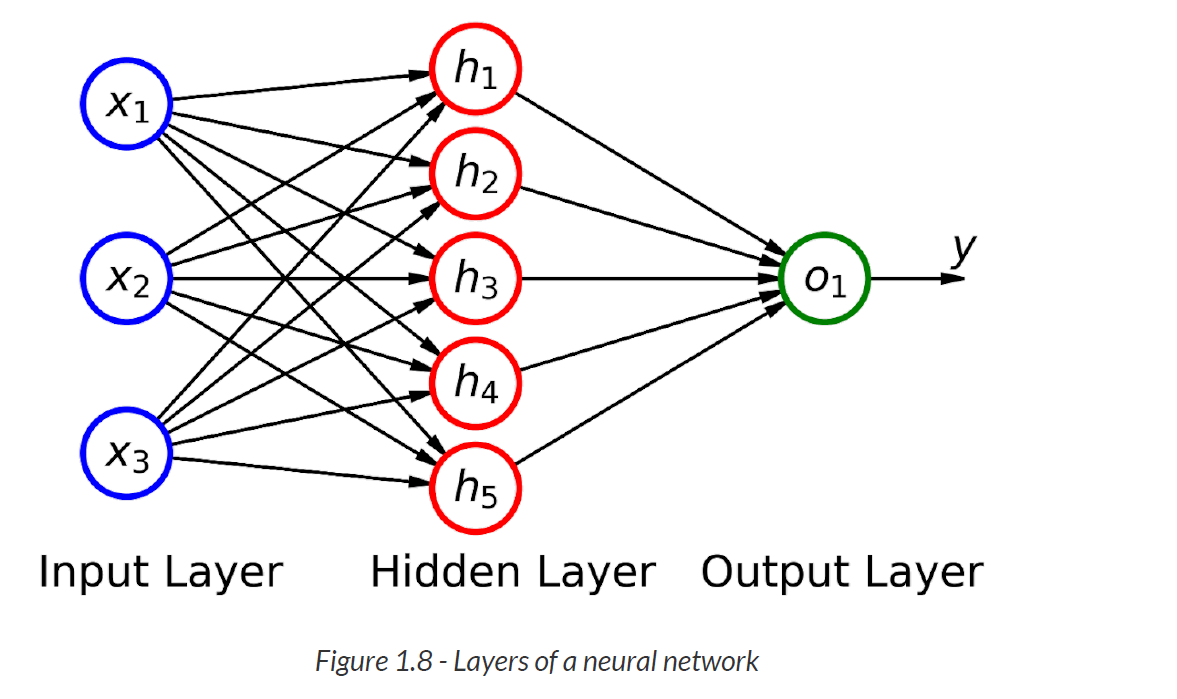![image.png](
  

)

In [ ]:
torch.manual_seed(42)
# Building the model from the figure above
model = nn.Sequential(nn.Linear(3, 5), nn.Linear(5, 1)).to(device)
model.state_dict()

In [ ]:
torch.manual_seed(42)
# Building the model from the figure above
model = nn.Sequential(nn.Linear(3, 5), nn.Linear(5, 1)).to(device)
model.state_dict()

In [ ]:
torch.manual_seed(42)
# Building the model from the figure above
model = nn.Sequential()
model.add_module('layer1', nn.Linear(3, 5))
model.add_module('layer2', nn.Linear(5, 1))
model.to(device)

# Relaciones no lineales

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# ===== 1. Generación de datos (función no lineal + ruido) =====
np.random.seed(42)
X = np.linspace(-5, 5, 100).reshape(-1, 1)
y = np.sin(X) + 0.3 * np.random.randn(*X.shape)  # y = sin(x) + ruido

In [ ]:
# Gráfico 1: Datos originales
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X, y, color='blue', alpha=0.5, label='Datos reales (y = sin(x) + ruido)')
plt.title("Datos originales")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()


In [ ]:
# Convertir a tensores PyTorch
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

In [ ]:
import torch.nn as nn

class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()

        self.num_salidas_capa1 = 5  # Número de neuronas en la capa 1

        self.layer1 = nn.Linear(1, self.num_salidas_capa1)
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(self.num_salidas_capa1, 1)  # Salida escalar

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        return x

In [ ]:
model = SimpleNN()

# ===== 3. Configuración del entrenamiento =====
criterion = nn.MSELoss()  # Función de pérdida
optimizer = optim.Adam(model.parameters(), lr=0.01)  # Optimizador

# ===== 4. Entrenamiento =====
epochs = 1000
loss_history = []

for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_tensor)
    loss = criterion(outputs, y_tensor)
    loss.backward()
    optimizer.step()
    loss_history.append(loss.item())

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# ===== 5. Visualización =====
with torch.no_grad():
    predictions = model(X_tensor).numpy()

In [ ]:
# Gráfico 2: Ajuste del modelo
plt.subplot(1, 2, 2)
plt.scatter(X, y, color='blue', alpha=0.5, label='Datos reales')
plt.plot(X, predictions, color='red', linewidth=2, label='Predicción del modelo')
plt.title("Ajuste de la red neuronal (ReLU en el medio)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Ejemplo real

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [6]:

# 1. Cargar el dataset
data = fetch_california_housing()
X, y = data.data, data.target

# 2. Convertir a DataFrame
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y  # Agregamos la columna objetivo

# 3. Mostrar las primeras filas
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


In [7]:
# 1. Load dataset
data = fetch_california_housing()
X, y = data.data, data.target

In [3]:
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [12]:
# 2. Preprocessing: Train/test split and normalization
data = fetch_california_housing()
X, y = data.data, data.target

# 2. Dividir en entrenamiento y prueba + estandarizar
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

3. Llevamos a cabo la estandarización:

In [15]:
scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test = scaler_y.transform(y_test.reshape(-1, 1)).flatten()

In [16]:
# 3. Convertir a tensores
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

# Modelo de regresión líneal

In [36]:
# 4. Modelo de regresión lineal
linear_model = nn.Linear(X_train.shape[1], 1)
optimizer_lin = optim.SGD(linear_model.parameters(), lr=0.01)
loss_fn = nn.MSELoss()

In [18]:
#for epoch in range(300):
#    preds = linear_model(X_train)
#    loss = loss_fn(preds, y_train)
#    optimizer_lin.zero_grad()
#    loss.backward()
#    optimizer_lin.step()

In [37]:
# Antes del entrenamiento
print("Pesos iniciales:", linear_model.weight)
print("Bias inicial:", linear_model.bias)

Pesos iniciales: Parameter containing:
tensor([[-0.1162,  0.0745,  0.0865, -0.0882,  0.0442,  0.2063,  0.1132,  0.1785]],
       requires_grad=True)
Bias inicial: Parameter containing:
tensor([-0.3463], requires_grad=True)


In [38]:
# Lista para almacenar pérdidas del modelo lineal
linear_losses = []

for epoch in range(300):
    preds = linear_model(X_train)
    loss = loss_fn(preds, y_train)
    linear_losses.append(loss.item())  # Guardar pérdida

    optimizer_lin.zero_grad()
    loss.backward()
    optimizer_lin.step()

In [39]:
# Después del entrenamiento (tras el bucle)
print("Pesos finales:", linear_model.weight)
print("Bias final:", linear_model.bias)

Pesos finales: Parameter containing:
tensor([[ 0.6771,  0.1813,  0.0167, -0.0094,  0.0224, -0.0396, -0.2210, -0.1822]],
       requires_grad=True)
Bias final: Parameter containing:
tensor([-0.0008], requires_grad=True)


# Modelo con la red neuronal

In [20]:
X_train.shape[1]

8

In [21]:
# 5. Modelo de red neuronal con ReLU
class NeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(X_train.shape[1], 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.net(x)

In [22]:
nn_model = NeuralNet()
optimizer_nn = optim.Adam(nn_model.parameters(), lr=0.01)

In [30]:
# Lista para almacenar pérdidas de la red neuronal
nn_losses = []

for epoch in range(1000):
    preds = nn_model(X_train)
    loss = loss_fn(preds, y_train)
    nn_losses.append(loss.item())  # Guardar pérdida

    optimizer_nn.zero_grad()
    loss.backward()
    optimizer_nn.step()

# 6. Evaluación con y en su escala original
with torch.no_grad():
    y_pred_lin = linear_model(X_test).numpy()
    y_pred_nn = nn_model(X_test).numpy()
    y_test_np = y_test.numpy()


In [24]:
    # Inversión de la escala
    y_pred_lin_orig = scaler_y.inverse_transform(y_pred_lin)
    y_pred_nn_orig = scaler_y.inverse_transform(y_pred_nn)
    y_test_orig = scaler_y.inverse_transform(y_test_np)

In [26]:
with torch.no_grad():
    y_pred_lin = linear_model(X_test).numpy()
    y_pred_nn = nn_model(X_test).numpy()
    y_test_np = y_test.numpy()

    # Inversión de la escala
    y_pred_lin_orig = scaler_y.inverse_transform(y_pred_lin)
    y_pred_nn_orig = scaler_y.inverse_transform(y_pred_nn)
    y_test_orig = scaler_y.inverse_transform(y_test_np)

    # Métricas
    def report_metrics(name, y_true, y_pred):
        print(f"{name}:")
        print(f"  MSE : {mean_squared_error(y_true, y_pred):.4f}")
        print(f"  MAE : {mean_absolute_error(y_true, y_pred):.4f}")
        print(f"  R²  : {r2_score(y_true, y_pred):.4f}\n")

    report_metrics("Linear Regression", y_test_orig, y_pred_lin_orig)
    report_metrics("Neural Network", y_test_orig, y_pred_nn_orig)


Linear Regression:
  MSE : 0.5760
  MAE : 0.5553
  R²  : 0.5605

Neural Network:
  MSE : 0.2722
  MAE : 0.3636
  R²  : 0.7923



In [56]:
import numpy as np
np.mean(y_test_orig)

np.float32(2.0550032)

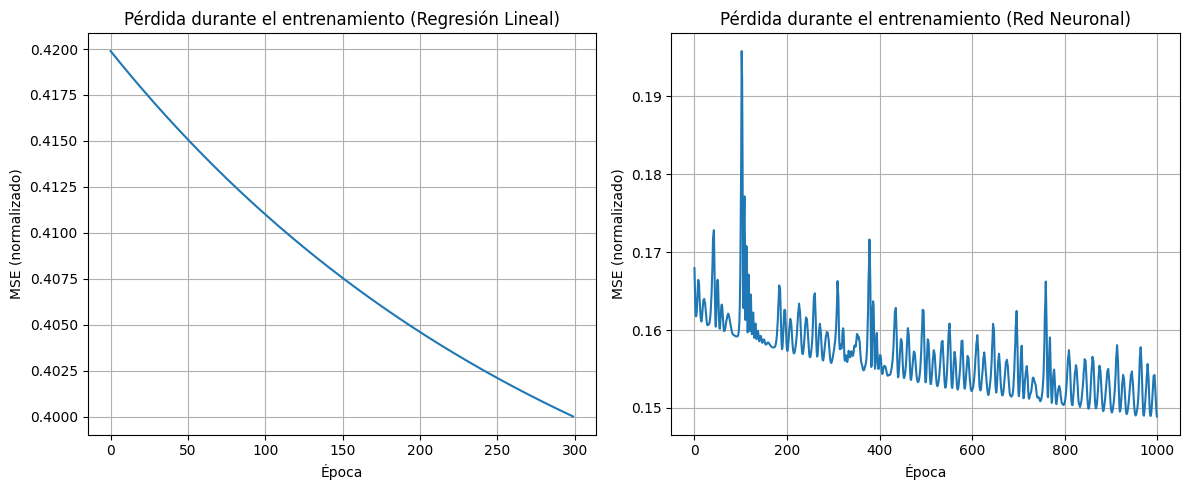

In [33]:
# 7. Graficar pérdidas durante el entrenamiento
plt.figure(figsize=(12, 5))

# Gráfica para el modelo lineal
plt.subplot(1, 2, 1)
plt.plot(linear_losses)
plt.title("Pérdida durante el entrenamiento (Regresión Lineal)")
plt.xlabel("Época")
plt.ylabel("MSE (normalizado)")
plt.grid(True)

# Gráfica para la red neuronal
plt.subplot(1, 2, 2)
plt.plot(nn_losses)
plt.title("Pérdida durante el entrenamiento (Red Neuronal)")
plt.xlabel("Época")
plt.ylabel("MSE (normalizado)")
plt.grid(True)

plt.tight_layout()
plt.show()

En la misma escala

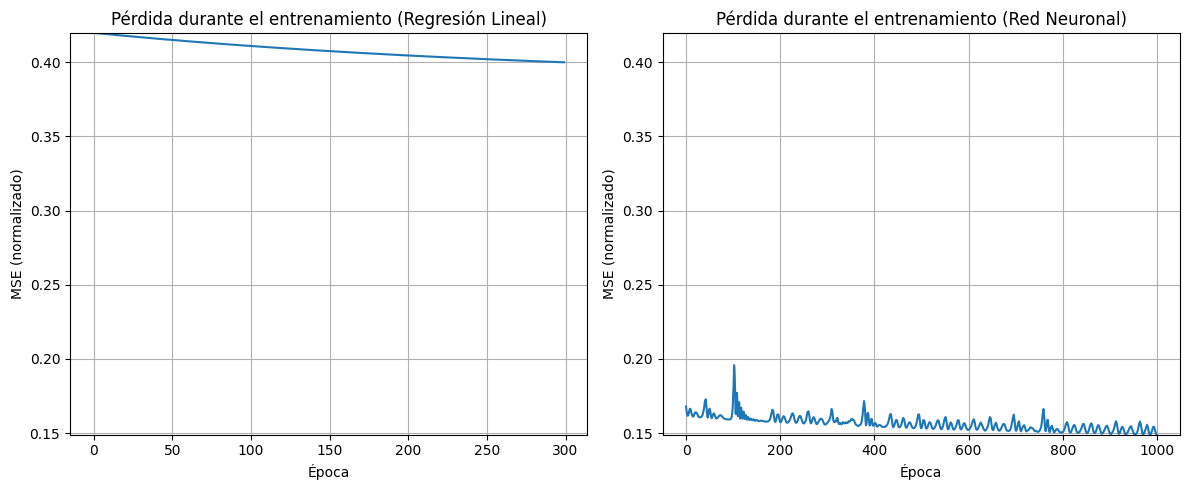

In [34]:
# 7. Graficar pérdidas durante el entrenamiento
plt.figure(figsize=(12, 5))

# Encontrar los límites comunes para el eje Y
y_min = min(min(linear_losses), min(nn_losses))
y_max = max(max(linear_losses), max(nn_losses))

# Gráfica para el modelo lineal
plt.subplot(1, 2, 1)
plt.plot(linear_losses)
plt.title("Pérdida durante el entrenamiento (Regresión Lineal)")
plt.xlabel("Época")
plt.ylabel("MSE (normalizado)")
plt.ylim(y_min, y_max)  # Misma escala que la red neuronal
plt.grid(True)

# Gráfica para la red neuronal
plt.subplot(1, 2, 2)
plt.plot(nn_losses)
plt.title("Pérdida durante el entrenamiento (Red Neuronal)")
plt.xlabel("Época")
plt.ylabel("MSE (normalizado)")
plt.ylim(y_min, y_max)  # Misma escala que la regresión lineal
plt.grid(True)

plt.tight_layout()
plt.show()

# Guardar el archivo

In [40]:
# Guardar ambos modelos (regresión lineal y red neuronal)
torch.save(linear_model.state_dict(), 'linear_model.pth')
torch.save(nn_model.state_dict(), 'neural_net.pth')

# Opcional: Guardar también los scalers para poder preprocesar nuevos datos
import joblib
joblib.dump(scaler_X, 'scaler_X.save')
joblib.dump(scaler_y, 'scaler_y.save')

['scaler_y.save']

In [42]:
# Cargar los modelos (ejemplo en un nuevo script)
linear_model_loaded = nn.Linear(X_train.shape[1], 1)
linear_model_loaded.load_state_dict(torch.load('linear_model.pth'))
linear_model_loaded.eval()  # Modo evaluación

nn_model_loaded = NeuralNet()  # Asegúrate de tener la clase NeuralNet definida
nn_model_loaded.load_state_dict(torch.load('neural_net.pth'))
nn_model_loaded.eval()

# Cargar los scalers
scaler_X_loaded = joblib.load('scaler_X.save')
scaler_y_loaded = joblib.load('scaler_y.save')

# Ejemplo con la primera fila de X_test (nuevos datos deben tener la misma estructura)
new_data = X_test[0:1]  # Primera fila (mantener dimensión 2D)

# Preprocesar los nuevos datos
new_data_scaled = scaler_X_loaded.transform(new_data.numpy())

# Convertir a tensor
new_data_tensor = torch.tensor(new_data_scaled, dtype=torch.float32)


In [43]:
# Hacer predicciones
with torch.no_grad():
    pred_lin = linear_model_loaded(new_data_tensor)
    pred_nn = nn_model_loaded(new_data_tensor)

    # Llevar las predicciones a la escala original
    pred_lin_orig = scaler_y_loaded.inverse_transform(pred_lin.numpy())
    pred_nn_orig = scaler_y_loaded.inverse_transform(pred_nn.numpy())

print(f"Predicción Regresión Lineal: {pred_lin_orig[0][0]:.2f}")
print(f"Predicción Red Neuronal: {pred_nn_orig[0][0]:.2f}")

Predicción Regresión Lineal: -8.87
Predicción Red Neuronal: 5.14


In [44]:
y_test[0]

tensor([-1.3795])

array([-1.3794837], dtype=float32)

In [52]:
scaler_y.inverse_transform(y_test.numpy())[0]

array([0.47699997], dtype=float32)

In [14]:
# 3. Convertir a tensores
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

In [ ]:

# 1. Cargar dataset
data = fetch_california_housing()
X, y = data.data, data.target

# 2. Dividir en entrenamiento y prueba + estandarizar
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)





# 3. Convertir a tensores
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

# 4. Modelo de regresión lineal
linear_model = nn.Linear(X_train.shape[1], 1)
optimizer_lin = optim.SGD(linear_model.parameters(), lr=0.01)
loss_fn = nn.MSELoss()

for epoch in range(300):
    preds = linear_model(X_train)
    loss = loss_fn(preds, y_train)
    optimizer_lin.zero_grad()
    loss.backward()
    optimizer_lin.step()

# 5. Modelo de red neuronal con ReLU
class NeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(X_train.shape[1], 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.net(x)

nn_model = NeuralNet()
optimizer_nn = optim.Adam(nn_model.parameters(), lr=0.01)

losses = []
for epoch in range(1000):
    preds = nn_model(X_train)
    loss = loss_fn(preds, y_train)
    losses.append(loss.item())
    optimizer_nn.zero_grad()
    loss.backward()
    optimizer_nn.step()

# 6. Evaluación con y en su escala original
with torch.no_grad():
    y_pred_lin = linear_model(X_test).numpy()
    y_pred_nn = nn_model(X_test).numpy()
    y_test_np = y_test.numpy()

    # Inversión de la escala
    y_pred_lin_orig = scaler_y.inverse_transform(y_pred_lin)
    y_pred_nn_orig = scaler_y.inverse_transform(y_pred_nn)
    y_test_orig = scaler_y.inverse_transform(y_test_np)

    # Métricas
    def report_metrics(name, y_true, y_pred):
        print(f"{name}:")
        print(f"  MSE : {mean_squared_error(y_true, y_pred):.4f}")
        print(f"  MAE : {mean_absolute_error(y_true, y_pred):.4f}")
        print(f"  R²  : {r2_score(y_true, y_pred):.4f}\n")

    report_metrics("Linear Regression", y_test_orig, y_pred_lin_orig)
    report_metrics("Neural Network", y_test_orig, y_pred_nn_orig)

# 7. Graficar pérdida de la red neuronal
plt.plot(losses)
plt.title("Pérdida durante el entrenamiento (Neural Network)")
plt.xlabel("Época")
plt.ylabel("MSE (normalizado)")
plt.grid(True)
plt.show()


In [ ]:

scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test = scaler_y.transform(y_test.reshape(-1, 1)).flatten()

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

# 3. Linear regression model
linear_model = nn.Linear(X_train.shape[1], 1)
optimizer_lin = optim.SGD(linear_model.parameters(), lr=0.01)
loss_fn = nn.MSELoss()

# Train linear model
for epoch in range(300):
    preds = linear_model(X_train)
    loss = loss_fn(preds, y_train)
    optimizer_lin.zero_grad()
    loss.backward()
    optimizer_lin.step()

# 4. Neural Network with ReLU
class NeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(X_train.shape[1], 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.net(x)

nn_model = NeuralNet()
optimizer_nn = optim.Adam(nn_model.parameters(), lr=0.01)

# Train NN
losses = []
for epoch in range(1000):
    preds = nn_model(X_train)
    loss = loss_fn(preds, y_train)
    losses.append(loss.item())
    optimizer_nn.zero_grad()
    loss.backward()
    optimizer_nn.step()

# 5. Evaluate models
with torch.no_grad():
    y_pred_lin = linear_model(X_test)
    y_pred_nn = nn_model(X_test)

    mse_lin = loss_fn(y_pred_lin, y_test).item()
    mse_nn = loss_fn(y_pred_nn, y_test).item()

print(f"Test MSE (Linear Regression): {mse_lin:.4f}")
print(f"Test MSE (Neural Network):    {mse_nn:.4f}")

# 6. Optional: Plot losses
plt.plot(losses)
plt.title("Neural Network Training Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.show()
